In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files

uploaded = files.upload()

Saving social_media_engagement_5000.csv to social_media_engagement_5000.csv


In [3]:
df = pd.read_csv("social_media_engagement_5000.csv")
df

,user_id,age,gender,country,post_id,post_type,post_category,likes,comments,shares,watch_time_sec,impression_count,posted_at,follower_count,is_verified,device_type,sentiment,hashtags,engagement_rate
0,25795,43.0,Female,Brazil,496713,image,fitness,7011.0,354.0,1157.0,5726,44650,17-12-2022,81734,False,mobile,negative,#foodie #travel #love,0.190862
1,10860,33.0,Male,Brazil,157326,reel,food,11750.0,2606.0,1807.0,5947,80216,02-06-2023,5963,False,mobile,negative,#fitness,0.201493
2,86820,32.0,Female,UK,109864,text,food,4862.0,344.0,955.0,6946,44858,07-05-2023,501783,False,tablet,positive,#foodie,0.137345
3,64886,51.0,Other,France,848877,text,fitness,5350.0,1083.0,1049.0,229,70455,12-02-2023,480212,False,mobile,negative,#music #foodie #fun,0.106195
4,16265,34.0,Other,UK,449706,image,fitness,12682.0,2735.0,1300.0,4798,6019,23-05-2023,383936,False,mobile,negative,#travel,2.777372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,59500,44.0,Male,Australia,441541,video,education,16210.0,2013.0,1837.0,6190,42977,25-06-2022,646147,False,mobile,positive,#travel #fun,0.466761
4996,22100,38.0,Other,UAE,677076,reel,education,16924.0,2734.0,1583.0,7764,34196,18-11-2022,584603,False,desktop,negative,#foodie #reels,0.621155
4997,67021,63.0,Female,USA,273595,text,travel,13487.0,NaN,167.0,7466,23680,06-04-2023,483550,False,desktop,positive,#lifestyle #tech,0.679688
4998,29800,13.0,Female,Germany,785644,video,fitness,16894.0,1289.0,1713.0,4991,89013,16-05-2022,183295,False,tablet,positive,#reels #love #fitness,0.223518


In [4]:
#Shape of the data
df.shape


(5000, 19)

In [5]:
#Dataypes
df.dtypes

,0
user_id,int64
age,float64
gender,object
country,object
post_id,int64
post_type,object
post_category,object
likes,float64
comments,float64
shares,float64


In [7]:
#Changed the Datatype of Date
df['posted_at'] = pd.to_datetime(df['posted_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           5000 non-null   int64         
 1   age               4850 non-null   float64       
 2   gender            4850 non-null   object        
 3   country           5000 non-null   object        
 4   post_id           5000 non-null   int64         
 5   post_type         5000 non-null   object        
 6   post_category     5000 non-null   object        
 7   likes             4850 non-null   float64       
 8   comments          4850 non-null   float64       
 9   shares            4850 non-null   float64       
 10  watch_time_sec    5000 non-null   int64         
 11  impression_count  5000 non-null   int64         
 12  posted_at         5000 non-null   datetime64[ns]
 13  follower_count    5000 non-null   int64         
 14  is_verified       5000 n

/tmp/ipython-input-1296942568.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['posted_at'] = pd.to_datetime(df['posted_at']) #Changed the Datatype of Date


Data Cleaning

In [8]:
#Check for Missing Values
df.isnull().sum()

,0
user_id,0
age,150
gender,150
country,0
post_id,0
post_type,0
post_category,0
likes,150
comments,150
shares,150


In [9]:
df['age'].describe()

,age
count,4850.000000
mean,38.454021
std,14.912381
min,13.000000
25%,26.000000
50%,38.000000
75%,51.000000
max,64.000000


In [10]:
df['age'].fillna(df['age'].median(),inplace=True)

/tmp/ipython-input-2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [11]:
df['gender'].unique()

array(['Female', 'Male', 'Other', nan], dtype=object)

In [12]:
df['gender'].value_counts()

,count
gender,
Male,1699
Other,1581
Female,1570


In [13]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)

/tmp/ipython-input-1062339567.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0], inplace=True)


In [14]:
df[['likes','shares','comments']].describe().round()

,likes,shares,comments
count,4850.0,4850.0,4850.0
mean,10107.0,1003.0,1502.0
std,5790.0,580.0,870.0
min,10.0,0.0,0.0
25%,5068.0,498.0,760.0
50%,10106.0,1012.0,1497.0
75%,15115.0,1501.0,2256.0
max,19998.0,1999.0,2999.0


In [16]:
df[['likes','shares','comments']] = df[['likes','shares','comments']].fillna(df[['likes','shares','comments']].median())

In [17]:
df.isnull().sum()

,0
user_id,0
age,0
gender,0
country,0
post_id,0
post_type,0
post_category,0
likes,0
comments,0
shares,0


In [18]:
df['sentiment'].value_counts()

,count
sentiment,
positive,2363
neutral,1527
negative,960


In [19]:
#Hierarchical imputation

# Level 1: Post_Category + Post_Type mode
cat_type_Sentiment = df.groupby(['post_category', 'post_type'])['sentiment'].transform('first')

# Level 2: Post_Category mode
cat_Sentiment = df.groupby(['post_category'])['sentiment'].transform('first')

# Level 3: Overall mode
overall_Sentiment = df['sentiment'].mode()[0]

df['sentiment'] = df['sentiment'].fillna(cat_type_Sentiment).fillna(cat_Sentiment).fillna(overall_Sentiment)

In [20]:
df.isnull().sum()

,0
user_id,0
age,0
gender,0
country,0
post_id,0
post_type,0
post_category,0
likes,0
comments,0
shares,0


Duplicate Handling

In [21]:
#No Duplicates found
duplicates = df.duplicated().sum()
print(f"Duplicates found: {duplicates}")

Duplicates found: 0


Data Formatting

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           5000 non-null   int64         
 1   age               5000 non-null   float64       
 2   gender            5000 non-null   object        
 3   country           5000 non-null   object        
 4   post_id           5000 non-null   int64         
 5   post_type         5000 non-null   object        
 6   post_category     5000 non-null   object        
 7   likes             5000 non-null   float64       
 8   comments          5000 non-null   float64       
 9   shares            5000 non-null   float64       
 10  watch_time_sec    5000 non-null   int64         
 11  impression_count  5000 non-null   int64         
 12  posted_at         5000 non-null   datetime64[ns]
 13  follower_count    5000 non-null   int64         
 14  is_verified       5000 n

In [23]:
#Changing the datatype to Int
df[['age','likes','shares','comments']] = df[['age','likes','shares','comments']].astype(int)

In [24]:
df.dtypes

,0
user_id,int64
age,int64
gender,object
country,object
post_id,int64
post_type,object
post_category,object
likes,int64
comments,int64
shares,int64


In [26]:
#Standardize categories
df.columns = df.columns.str.strip().str.title()
df['Gender'] = df['Gender'].str.strip().str.title()
df['Sentiment'] = df['Sentiment'].str.strip().str.title()
df['Country'] = df['Country'].str.strip().str.title()
df['Post_Type'] = df['Post_Type'].str.strip().str.title()
df['Post_Category'] = df['Post_Category'].str.strip().str.title()
df['Device_Type'] = df['Device_Type'].str.strip().str.title()

Feature Cleaning

In [27]:
df['Hashtags'].value_counts()

,count
Hashtags,
#tech,201
#love,176
#fitness,174
#music,165
#fun,163
...,...
#fun #foodie #reels,1
#love #tech #music,1
#love #lifestyle #tech,1


In [28]:
# Extract hashtag count
df['Hashtags'] = df['Hashtags'].fillna('')
df['hashtag_count'] = df['Hashtags'].str.split().str.len()

In [29]:
print(df[['Age', 'Gender', 'Likes', 'Comments', 'Sentiment', 'hashtag_count']].head())

   Age  Gender  Likes  Comments Sentiment  hashtag_count
0   43  Female   7011       354  Negative              3
1   33    Male  11750      2606  Negative              1
2   32  Female   4862       344  Positive              1
3   51   Other   5350      1083  Negative              3
4   34   Other  12682      2735  Negative              1


 Data Exploration using Pandas

In [30]:
df.head() #Displays First 5 rows

,User_Id,Age,Gender,Country,Post_Id,Post_Type,Post_Category,Likes,Comments,Shares,Watch_Time_Sec,Impression_Count,Posted_At,Follower_Count,Is_Verified,Device_Type,Sentiment,Hashtags,Engagement_Rate,hashtag_count
0,25795,43,Female,Brazil,496713,Image,Fitness,7011,354,1157,5726,44650,2022-12-17,81734,False,Mobile,Negative,#foodie #travel #love,0.190862,3
1,10860,33,Male,Brazil,157326,Reel,Food,11750,2606,1807,5947,80216,2023-06-02,5963,False,Mobile,Negative,#fitness,0.201493,1
2,86820,32,Female,Uk,109864,Text,Food,4862,344,955,6946,44858,2023-05-07,501783,False,Tablet,Positive,#foodie,0.137345,1
3,64886,51,Other,France,848877,Text,Fitness,5350,1083,1049,229,70455,2023-02-12,480212,False,Mobile,Negative,#music #foodie #fun,0.106195,3
4,16265,34,Other,Uk,449706,Image,Fitness,12682,2735,1300,4798,6019,2023-05-23,383936,False,Mobile,Negative,#travel,2.777372,1


In [31]:
#Displays Last 5 rows
df.tail()

,User_Id,Age,Gender,Country,Post_Id,Post_Type,Post_Category,Likes,Comments,Shares,Watch_Time_Sec,Impression_Count,Posted_At,Follower_Count,Is_Verified,Device_Type,Sentiment,Hashtags,Engagement_Rate,hashtag_count
4995,59500,44,Male,Australia,441541,Video,Education,16210,2013,1837,6190,42977,2022-06-25,646147,False,Mobile,Positive,#travel #fun,0.466761,2
4996,22100,38,Other,Uae,677076,Reel,Education,16924,2734,1583,7764,34196,2022-11-18,584603,False,Desktop,Negative,#foodie #reels,0.621155,2
4997,67021,63,Female,Usa,273595,Text,Travel,13487,1497,167,7466,23680,2023-04-06,483550,False,Desktop,Positive,#lifestyle #tech,0.679688,2
4998,29800,13,Female,Germany,785644,Video,Fitness,16894,1289,1713,4991,89013,2022-05-16,183295,False,Tablet,Positive,#reels #love #fitness,0.223518,3
4999,73400,54,Other,Japan,712252,Text,Travel,14830,503,1798,3743,14234,2023-03-04,585760,False,Desktop,Neutral,#foodie #lifestyle #fashion,1.203527,3


In [32]:
#Diplays (rows, columns)
df.shape

(5000, 20)

In [33]:
#Displays Column names
df.columns

Index(['User_Id', 'Age', 'Gender', 'Country', 'Post_Id', 'Post_Type',
       'Post_Category', 'Likes', 'Comments', 'Shares', 'Watch_Time_Sec',
       'Impression_Count', 'Posted_At', 'Follower_Count', 'Is_Verified',
       'Device_Type', 'Sentiment', 'Hashtags', 'Engagement_Rate',
       'hashtag_count'],
      dtype='object')

In [34]:
#Displays Data types
df.dtypes

,0
User_Id,int64
Age,int64
Gender,object
Country,object
Post_Id,int64
Post_Type,object
Post_Category,object
Likes,int64
Comments,int64
Shares,int64


In [35]:
#Displays Full dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User_Id           5000 non-null   int64         
 1   Age               5000 non-null   int64         
 2   Gender            5000 non-null   object        
 3   Country           5000 non-null   object        
 4   Post_Id           5000 non-null   int64         
 5   Post_Type         5000 non-null   object        
 6   Post_Category     5000 non-null   object        
 7   Likes             5000 non-null   int64         
 8   Comments          5000 non-null   int64         
 9   Shares            5000 non-null   int64         
 10  Watch_Time_Sec    5000 non-null   int64         
 11  Impression_Count  5000 non-null   int64         
 12  Posted_At         5000 non-null   datetime64[ns]
 13  Follower_Count    5000 non-null   int64         
 14  Is_Verified       5000 n

In [36]:
#Displays Descriptive statistics
df.describe()

,User_Id,Age,Post_Id,Likes,Comments,Shares,Watch_Time_Sec,Impression_Count,Posted_At,Follower_Count,Engagement_Rate,hashtag_count
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000,5000.000000,5000.000000,5000.000000
mean,54561.890800,38.440400,548042.909000,10106.982400,1502.039800,1002.9106,4014.503200,50013.732800,2022-12-28 13:21:30.240000,393698.224800,0.964356,1.998600
min,10055.000000,13.000000,100068.000000,10.000000,0.000000,0.0000,0.000000,105.000000,2022-01-01 00:00:00,87.000000,0.006363,1.000000
25%,32309.500000,26.000000,322543.500000,5235.000000,792.000000,511.0000,2017.750000,24988.250000,2022-07-03 18:00:00,194480.000000,0.145781,1.000000
50%,54374.500000,38.000000,548077.500000,10105.000000,1497.000000,1012.0000,4034.500000,49934.500000,2022-12-27 00:00:00,388982.000000,0.253896,2.000000
75%,77180.500000,51.000000,771574.500000,14959.000000,2235.250000,1483.0000,6020.250000,74662.250000,2023-06-28 00:00:00,589744.250000,0.504794,3.000000
max,99963.000000,64.000000,999455.000000,19998.000000,2999.000000,1999.0000,7998.000000,99995.000000,2023-12-31 00:00:00,799533.000000,191.504348,3.000000
std,26090.370121,14.687151,260646.957267,5702.293022,856.393312,570.8552,2308.096459,28844.939104,NaN,230927.884535,5.318029,0.812853


In [37]:
 #show values count
df['Gender'].value_counts()

,count
Gender,
Male,1849
Other,1581
Female,1570


In [38]:
df['Post_Type'].value_counts()

,count
Post_Type,
Reel,1283
Image,1247
Text,1245
Video,1225


In [39]:
df['Sentiment'].value_counts()

,count
Sentiment,
Positive,2424
Neutral,1574
Negative,1002


In [40]:
#Shows Unique values
df.select_dtypes(include='object').nunique()

,0
Gender,3
Country,10
Post_Type,4
Post_Category,8
Device_Type,3
Sentiment,3
Hashtags,761


In [41]:
#Correlation Matrix
numeric_col = ['Age', 'Likes', 'Comments', 'Shares', 'Follower_Count']
corr_matrix = df[numeric_col].corr()
print(corr_matrix)

                     Age     Likes  Comments    Shares  Follower_Count
Age             1.000000 -0.036323 -0.007284  0.013871       -0.024894
Likes          -0.036323  1.000000 -0.018421  0.004712       -0.022982
Comments       -0.007284 -0.018421  1.000000  0.006142       -0.011733
Shares          0.013871  0.004712  0.006142  1.000000       -0.010783
Follower_Count -0.024894 -0.022982 -0.011733 -0.010783        1.000000


In [42]:
df.groupby('Post_Type')[['Likes','Comments','Shares']].mean().round()

,Likes,Comments,Shares
Post_Type,,,
Image,10105.0,1525.0,1019.0
Reel,10038.0,1504.0,982.0
Text,10100.0,1499.0,1014.0
Video,10189.0,1479.0,997.0


In [43]:
df.groupby('Country')['Impression_Count'].mean().round().sort_values(ascending=False)

,Impression_Count
Country,
India,52462.0
France,51728.0
Usa,51264.0
Uk,51119.0
Japan,49616.0
Brazil,49193.0
Uae,48928.0
Canada,48703.0
Germany,48605.0


Data Wrangling

In [44]:
user_profile = df[['User_Id', 'Age', 'Gender', 'Follower_Count']].drop_duplicates()
post_profile = df[['User_Id', 'Post_Id', 'Post_Type', 'Likes']]

In [45]:
merge_result = pd.merge(user_profile, post_profile, on='User_Id', how='inner') #Merge
merge_result

,User_Id,Age,Gender,Follower_Count,Post_Id,Post_Type,Likes
0,25795,43,Female,81734,496713,Image,7011
1,10860,33,Male,5963,157326,Reel,11750
2,86820,32,Female,501783,109864,Text,4862
3,64886,51,Other,480212,848877,Text,5350
4,16265,34,Other,383936,449706,Image,12682
...,...,...,...,...,...,...,...
5277,59500,44,Male,646147,441541,Video,16210
5278,22100,38,Other,584603,677076,Reel,16924
5279,67021,63,Female,483550,273595,Text,13487
5280,29800,13,Female,183295,785644,Video,16894


In [46]:
s1 = df.head(1000)
s2 = df.tail(1000)
concat_result = pd.concat([s1, s2], ignore_index=True) #Concat
concat_result

,User_Id,Age,Gender,Country,Post_Id,Post_Type,Post_Category,Likes,Comments,Shares,Watch_Time_Sec,Impression_Count,Posted_At,Follower_Count,Is_Verified,Device_Type,Sentiment,Hashtags,Engagement_Rate,hashtag_count
0,25795,43,Female,Brazil,496713,Image,Fitness,7011,354,1157,5726,44650,2022-12-17,81734,False,Mobile,Negative,#foodie #travel #love,0.190862,3
1,10860,33,Male,Brazil,157326,Reel,Food,11750,2606,1807,5947,80216,2023-06-02,5963,False,Mobile,Negative,#fitness,0.201493,1
2,86820,32,Female,Uk,109864,Text,Food,4862,344,955,6946,44858,2023-05-07,501783,False,Tablet,Positive,#foodie,0.137345,1
3,64886,51,Other,France,848877,Text,Fitness,5350,1083,1049,229,70455,2023-02-12,480212,False,Mobile,Negative,#music #foodie #fun,0.106195,3
4,16265,34,Other,Uk,449706,Image,Fitness,12682,2735,1300,4798,6019,2023-05-23,383936,False,Mobile,Negative,#travel,2.777372,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,59500,44,Male,Australia,441541,Video,Education,16210,2013,1837,6190,42977,2022-06-25,646147,False,Mobile,Positive,#travel #fun,0.466761,2
1996,22100,38,Other,Uae,677076,Reel,Education,16924,2734,1583,7764,34196,2022-11-18,584603,False,Desktop,Negative,#foodie #reels,0.621155,2
1997,67021,63,Female,Usa,273595,Text,Travel,13487,1497,167,7466,23680,2023-04-06,483550,False,Desktop,Positive,#lifestyle #tech,0.679688,2
1998,29800,13,Female,Germany,785644,Video,Fitness,16894,1289,1713,4991,89013,2022-05-16,183295,False,Tablet,Positive,#reels #love #fitness,0.223518,3


In [47]:
user_indexed = user_profile.set_index('User_Id')
post_indexed = post_profile.set_index('User_Id')
join_result = user_indexed.join(post_indexed, how='left') #Used JOin
join_result

,Age,Gender,Follower_Count,Post_Id,Post_Type,Likes
User_Id,,,,,,
25795,43,Female,81734,496713,Image,7011
10860,33,Male,5963,157326,Reel,11750
86820,32,Female,501783,109864,Text,4862
64886,51,Other,480212,848877,Text,5350
16265,34,Other,383936,449706,Image,12682
...,...,...,...,...,...,...
59500,44,Male,646147,441541,Video,16210
22100,38,Other,584603,677076,Reel,16924
67021,63,Female,483550,273595,Text,13487


In [48]:
#Created new fields such as engagement_scored

df['engagement_score'] = (
    df['Likes'] * 4 +
    df['Comments'] * 3 +
    df['Shares'] * 5 +
    df['Watch_Time_Sec'] * 0.1
)
df['engagement_score']

,engagement_score
0,35463.6
1,64447.7
2,25949.6
3,29916.9
4,65912.8
...,...
4995,80683.0
4996,84589.4
4997,60020.6
4998,80507.1


In [49]:
#Group_By Funcations
post_summary = df.groupby('Post_Type')['engagement_score'].agg(['mean', 'sum', 'count']).round()
post_summary

,mean,sum,count
Post_Type,,,
Image,50480.0,62948198.0,1247
Reel,49987.0,64133942.0,1283
Text,50369.0,62709260.0,1245
Video,50579.0,61958862.0,1225


In [50]:
Country_summary = df.groupby('Country')['engagement_score'].agg(['mean', 'sum']).round(2)
Country_summary

,mean,sum
Country,,
Australia,51197.38,25240306.3
Brazil,49467.23,24931486.0
Canada,50273.56,25790338.6
France,51585.88,25586594.3
Germany,50381.75,24687059.5
India,49912.80,26703345.7
Japan,50131.31,23661976.9
Uae,50879.70,25592487.5
Uk,49471.95,24389672.6


In [51]:
Sentiment_summary = df.groupby('Sentiment')['engagement_score'].mean().round(2)
Sentiment_summary

,engagement_score
Sentiment,
Negative,50905.01
Neutral,49774.81
Positive,50494.18


Statistical Analysis


In [52]:
stat_cols = ['Likes', 'Comments', 'Shares', 'Watch_Time_Sec', 'Engagement_Rate', 'Follower_Count']

In [53]:
df[stat_cols].describe().round()

,Likes,Comments,Shares,Watch_Time_Sec,Engagement_Rate,Follower_Count
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,10107.0,1502.0,1003.0,4015.0,1.0,393698.0
std,5702.0,856.0,571.0,2308.0,5.0,230928.0
min,10.0,0.0,0.0,0.0,0.0,87.0
25%,5235.0,792.0,511.0,2018.0,0.0,194480.0
50%,10105.0,1497.0,1012.0,4034.0,0.0,388982.0
75%,14959.0,2235.0,1483.0,6020.0,1.0,589744.0
max,19998.0,2999.0,1999.0,7998.0,192.0,799533.0


In [54]:
#Mean, median, mode
all_stats = pd.DataFrame({
    'mean': df[stat_cols].mean(),
    'median': df[stat_cols].median(),
    'mode': df[stat_cols].mode().iloc[0]
})
print(all_stats)

                          mean         median           mode
Likes             10106.982400   10105.000000   10105.000000
Comments           1502.039800    1497.000000    1497.000000
Shares             1002.910600    1012.000000    1012.000000
Watch_Time_Sec     4014.503200    4034.500000     916.000000
Engagement_Rate       0.964356       0.253896       0.006363
Follower_Count   393698.224800  388982.000000  497502.000000


In [55]:
#Standard deviation, variance
SD = pd.DataFrame({
    'Std_Dev': df[stat_cols].std().round(2),
    'Variance': df[stat_cols].var().round(2)})
print(SD)

                   Std_Dev      Variance
Likes              5702.29  3.251615e+07
Comments            856.39  7.334095e+05
Shares              570.86  3.258757e+05
Watch_Time_Sec     2308.10  5.327309e+06
Engagement_Rate       5.32  2.828000e+01
Follower_Count   230927.88  5.332769e+10


In [56]:
#Percentiles
percentiles = df[stat_cols][['Likes', 'Comments', 'Shares', 'Watch_Time_Sec']].quantile([0.25, 0.5, 0.75]).round(2)

print(percentiles)

        Likes  Comments  Shares  Watch_Time_Sec
0.25   5235.0    792.00   511.0         2017.75
0.50  10105.0   1497.00  1012.0         4034.50
0.75  14959.0   2235.25  1483.0         6020.25


Data Visualization (Min. 8 Plots Required)

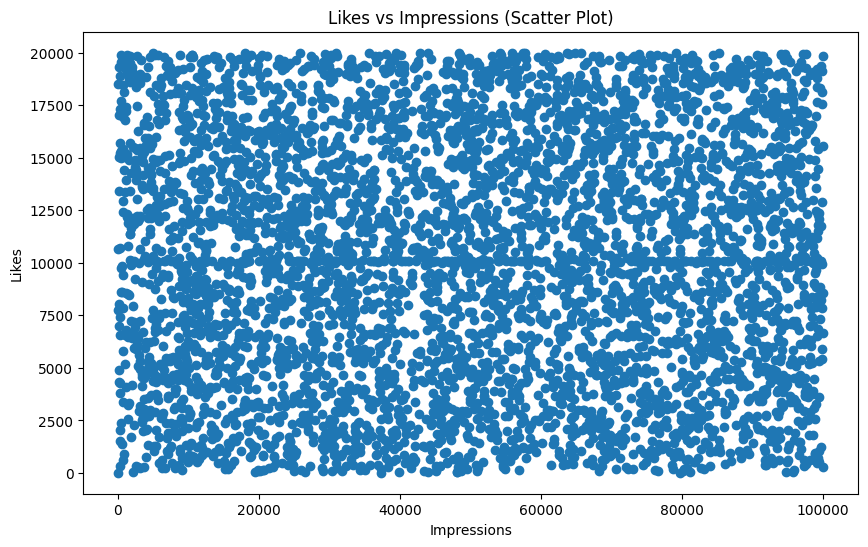

In [57]:
# Scatter: Likes vs impressions
plt.figure(figsize=(10, 6))
plt.scatter(df['Impression_Count'], df['Likes'])
plt.xlabel('Impressions')
plt.ylabel('Likes')
plt.title('Likes vs Impressions (Scatter Plot)')
plt.show()

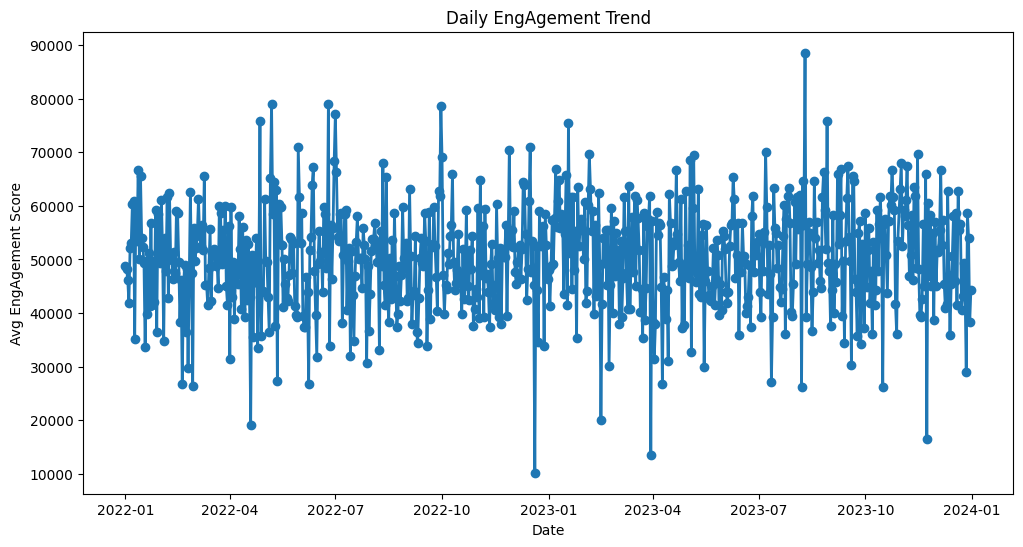

In [58]:
# Line : daily engAgement trend
df['date'] = df['Posted_At']
daily_trend = df.groupby('date')['engagement_score'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_trend.index, daily_trend.values, marker='o', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Avg EngAgement Score')
plt.title('Daily EngAgement Trend')
plt.show()

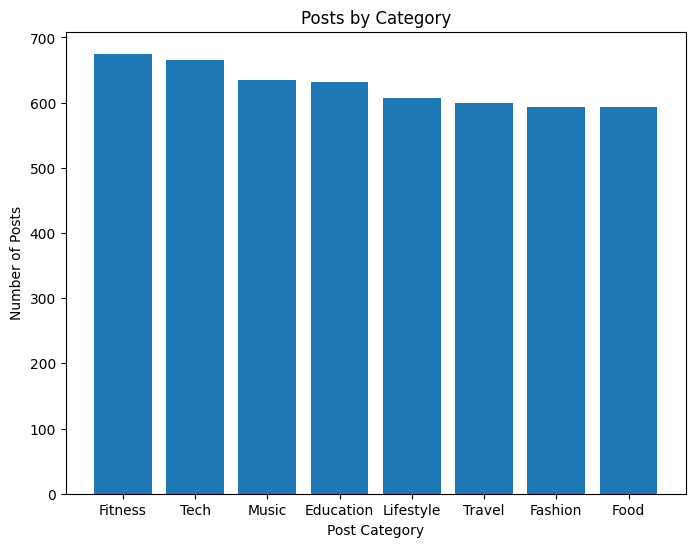

In [62]:
# Bar: posts by category
category_counts = df['Post_Category'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Post Category')
plt.ylabel('Number of Posts')
plt.title('Posts by Category')
plt.show()

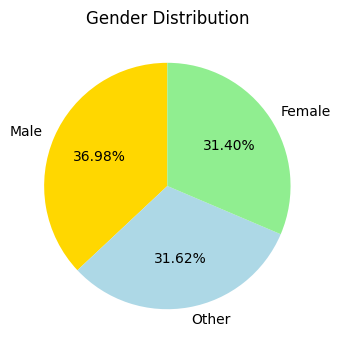

In [61]:
# Pie: Gender distribution
Gender_data = df['Gender'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(Gender_data.values, labels=Gender_data.index, autopct='%0.2f%%', startangle=90, colors=['gold','lightblue','lightgreen'])
plt.title("Gender Distribution")
plt.show()

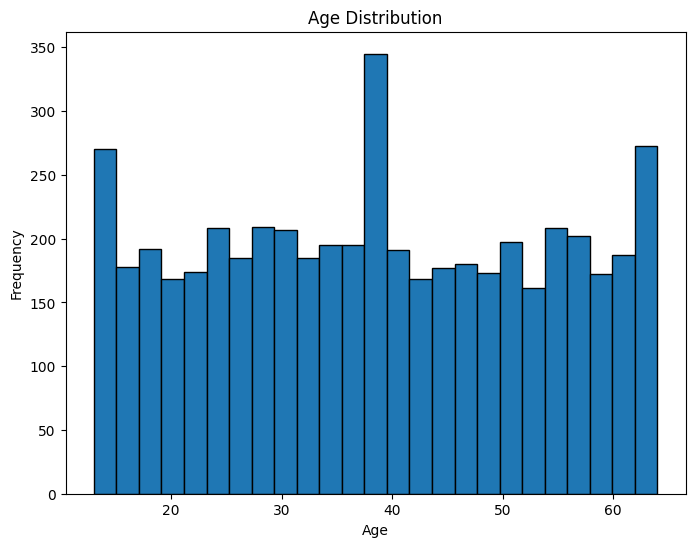

In [64]:
# Histogram: Age

plt.figure(figsize=(8,6))
plt.hist(df['Age'], bins=25, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

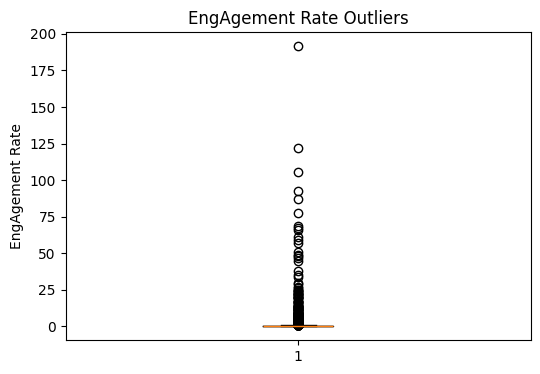

In [65]:
# BOX PLOT: engAgement rate
plt.figure(figsize=(6,4))
plt.boxplot(df['Engagement_Rate'])
plt.title("EngAgement Rate Outliers")
plt.ylabel("EngAgement Rate")
plt.show()

Seaborn

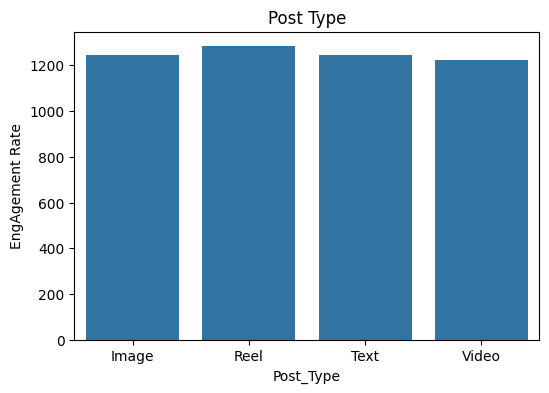

In [66]:
#Count plot: post type
plt.figure(figsize=(6,4))
sns.countplot(x='Post_Type', data=df)
plt.title("Post Type")
plt.ylabel("EngAgement Rate")
plt.show()

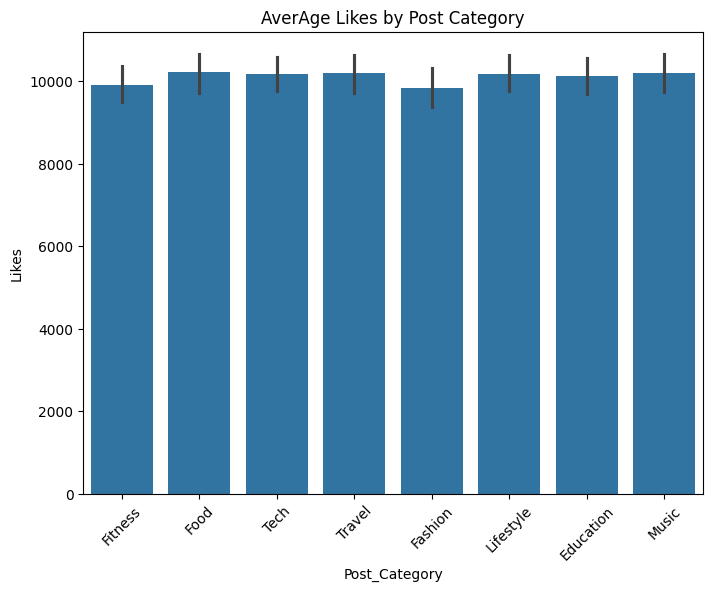

In [68]:
# Bar plot: avg Likes by category
plt.figure(figsize=(8,6))
sns.barplot(x='Post_Category', y='Likes', data=df)
plt.title('AverAge Likes by Post Category')
plt.xticks(rotation=45)
plt.show()

In [72]:
#INTERACTIVE LINE CHART - Daily EngAgement Trend

df['date'] = pd.to_datetime(df['Posted_At'])
df['day_name'] = df['date'].dt.day_name()
daily_engAgement = df.groupby(['day_name', 'Post_Type'])['engagement_score'].mean().reset_index()

fig_line = px.line(daily_engAgement, x='day_name', y='engagement_score', color='Post_Type', title='Interactive Line Chart - EngAgement by Day')
fig_line.show()

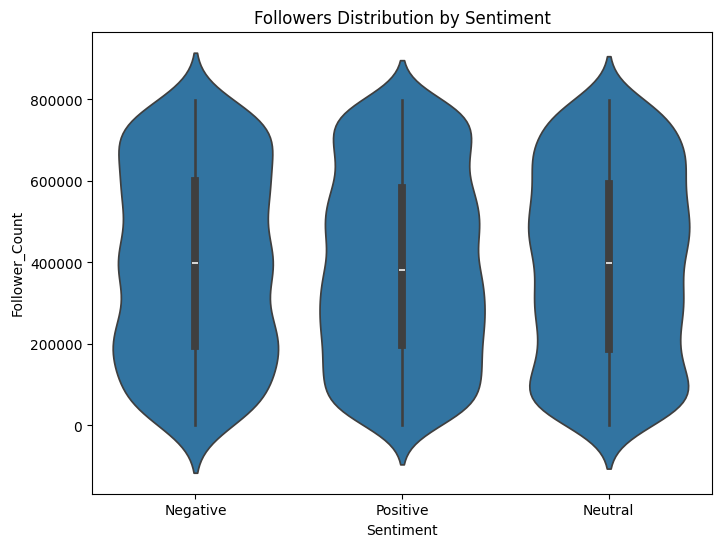

In [70]:
# Violin: followers vs Sentiment
plt.figure(figsize=(8,6))
sns.violinplot(x='Sentiment', y='Follower_Count', data=df)
plt.title('Followers Distribution by Sentiment')
plt.show()

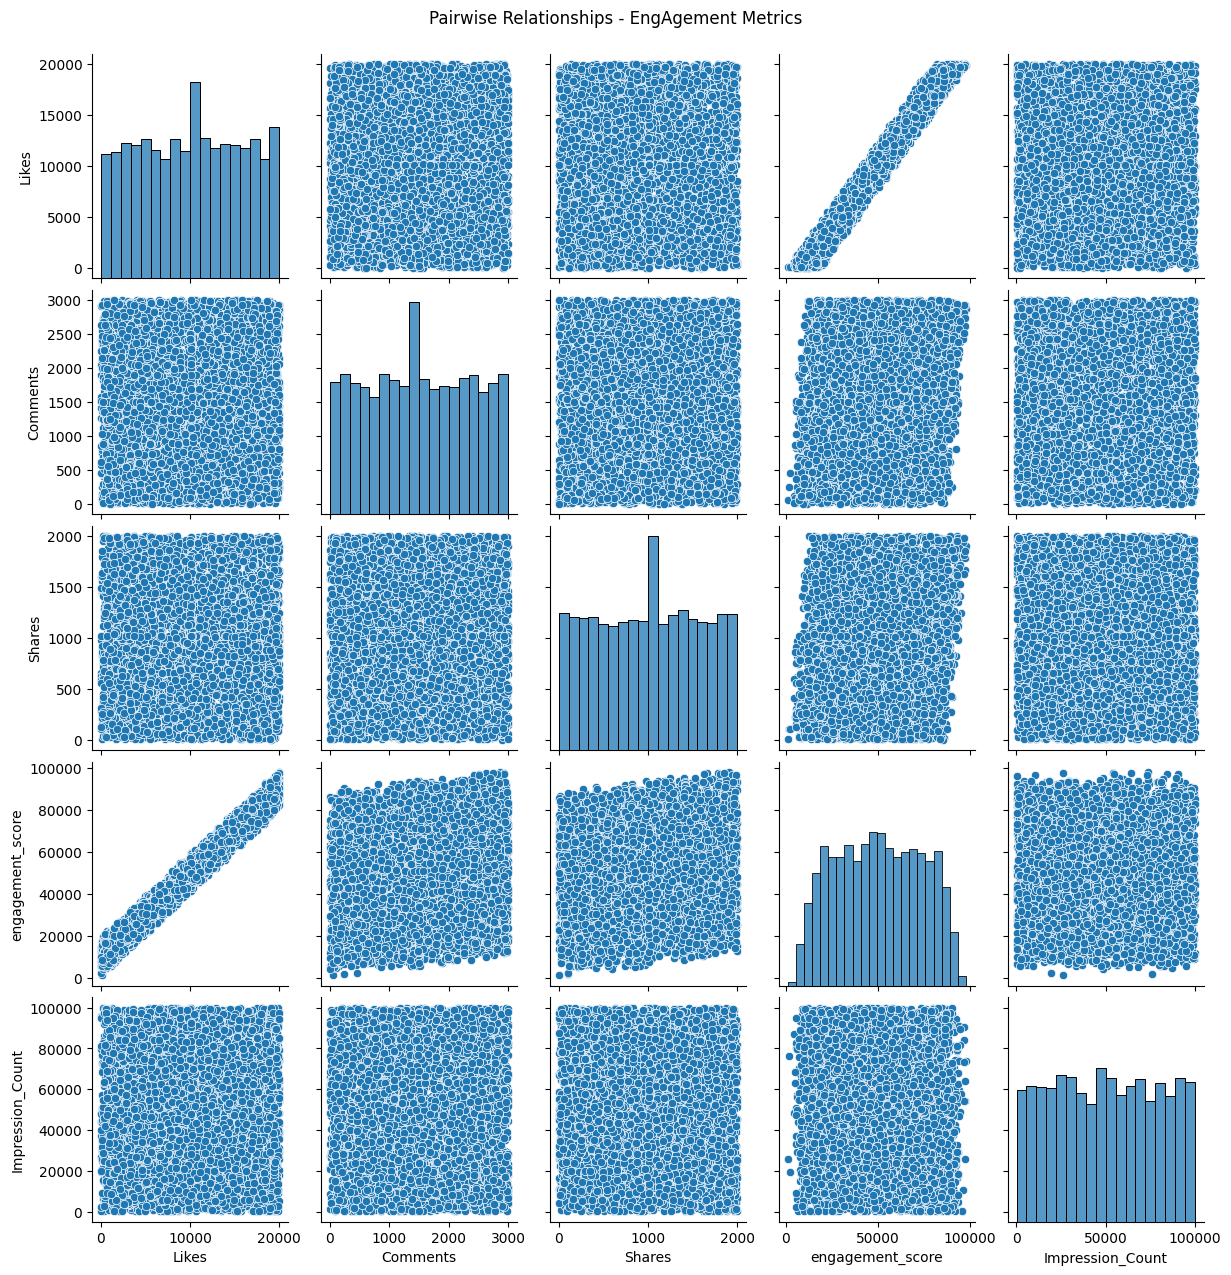

In [71]:
# Pair plot: numeric features

numeric_cols = ['Likes', 'Comments', 'Shares', 'engagement_score', 'Impression_Count']
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairwise Relationships - EngAgement Metrics', y=1.02)
plt.show()